https://www.kaggle.com/spscientist/students-performance-in-exams ------->DataSet link(taken from public source)

Library Importation

In [16]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

defining methods 

In [17]:
def reading_csv_file(file):
    '''reading_csv_file is for reading the csv files. It takes the file path from the user
    It prints the first 2 rows in dataset and return the dataset'''
    f = pandas.read_csv(file)
    print(f.head(2))
    
    return f
    

In [18]:
def pre_proc(DataFrame):
    ''' It takes the data frame from the user and provides the total null value count and it modify title of columns 
    and it provide the statistics of data and shape of DataFrame'''
    print("Shape of the data",DataFrame.shape)
    C = DataFrame.isnull().sum()
    print("Total Null Value Count in data frame",C)
    print()
    DataFrame.columns = [col.title().replace(' ','_') for col in DataFrame]
    print("Renamed Columns in data")
    print()
    for col in DataFrame.columns:
        print(col)
        
    print("Basic Statistics of data")
    print()
    print(DataFrame.describe())

In [19]:
def Box_plot_subplot(DataFrame,figsize,x,y):
    ''' This box plot takes the mainly four arguments there are Dataframe which is nothing but dataset,figsize which is figure size
      x is for x asis and y is for y axis. If y value is 0 it means only x values are there then it enters into inside the if loop
      otherwise it enters into else loop. Here The constraint is only user need to give the either 0 or some list of column values as list to y'''
    plt.figure(figsize=figsize)

    if y == 0:
            for i in range(1,len(list)+1):
                plt.subplot(1,len(list),i)
                sns.boxplot(data=DataFrame,x=list[i-1])
                plt.title(list[i-1])
                plt.tight_layout()
    else:
        for i in range(1,len(list)+1):
                plt.subplot(1,len(list),i)
                sns.boxplot(data=DataFrame,x=x,y=list[i-1])
                plt.title(list[i-1])
                plt.tight_layout()
        

In [20]:
def pie_subplot(DataFrame,figsize,list):
    '''This function takes the DataFrame,figsize and list and provides the boxplots'''
    plt.figure(figsize=figsize)

    for i in range(1,len(list)+1):
        plt.subplot(1,len(list),i)
        #v = list[i-1]
        plt.title(i)
        list[i-1].plot(kind = 'pie',autopct = '%.0f%%')
        plt.title(i)



In [21]:
def BarPlot(DataFrame,x,y,xlabel,ylabel,title,rotation):
    '''This bar plot takes the data from the user. DataFrame represents the data,x represents the x axis data
       y represents the y axis data,title is for indication of purpose of chart,rotation is for x axis labels '''
    
    sns.barplot(x = x,y = y)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation = rotation)
    plt.show()
    

Reading the Student performance dataset

In [22]:
Student_dataset = reading_csv_file('Datasets/StudentsPerformance.csv')

   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  


Checking the shape of Student_dataset , Null values in each columns ,pre_processing the column names and getting the statistics of Student_dataset

In [23]:
pre_proc(Student_dataset)

Shape of the data (1000, 8)
Total Null Value Count in data frame gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Renamed Columns in data

Gender
Race/Ethnicity
Parental_Level_Of_Education
Lunch
Test_Preparation_Course
Math_Score
Reading_Score
Writing_Score
Basic Statistics of data

       Math_Score  Reading_Score  Writing_Score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


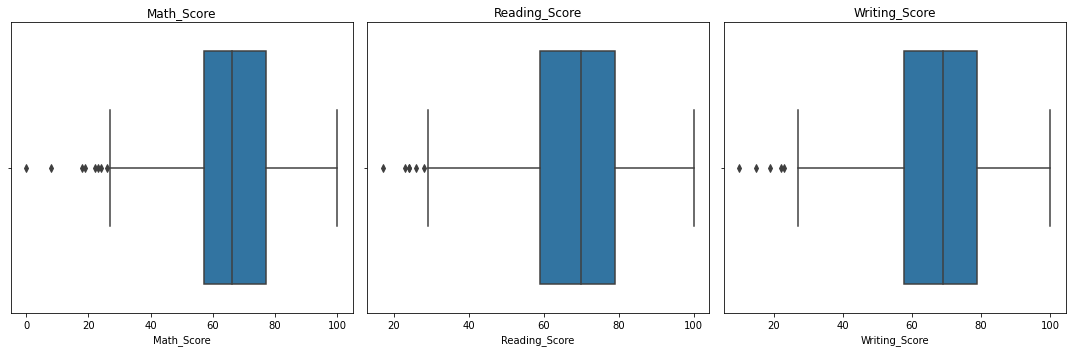

In [24]:
list = ['Math_Score','Reading_Score','Writing_Score']
        
Box_plot_subplot(Student_dataset,(15,5),list,0)
#hist_plot_subplot(Student_dataset,(15,5),list)

Here I Plotted the boxplot for 3 scores(Math_score,reading_score and Writing_score). We can draw the histogram plot for the same data but comapred to histogram box plots gives clear information about the values spreadout in Student_dataset.

Now I am Going to analyse the male and female performance in three scores(Math_Score,Reading_Score and Writing_Score) using the pie chart. Beacuse Pie chart gives good information about multiple classes of data in dataframe.

For Analysing the performance I considered the data above 80 % only in all three scores by using the query function.

In [10]:
math = Student_dataset.query('Math_Score > 80')
read = Student_dataset.query('Reading_Score > 80')
write= Student_dataset.query('Writing_Score > 80')

math_stat = math.groupby('Gender')['Math_Score'].count()
read_stat = read.groupby('Gender')['Reading_Score'].count()
write_stat = write.groupby('Gender')['Writing_Score'].count()
lis = [math_stat,read_stat,write_stat] 

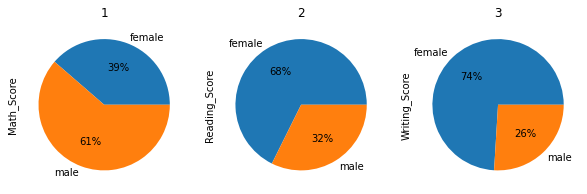

In [25]:
pie_subplot(Student_dataset,(10,4),lis)

According to the statistics presented above, a greater number of males scored greater than 80% in the mathematics section, as compared to females. A greater number of females scored greater than 80% in the reading and writing sections.

Now I am going to explore the student ethinicity

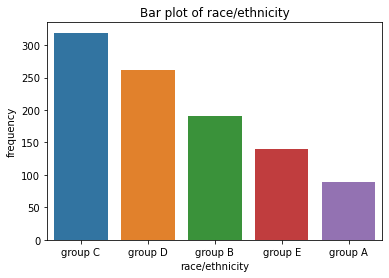

In [12]:
BarPlot(Student_dataset,Student_dataset['Race/Ethnicity'].value_counts().index,Student_dataset['Race/Ethnicity'].value_counts().values,'race/ethnicity','frequency','Bar plot of race/ethnicity',0)

From the above plot we can see that Group c(ethinicity) of student count is more compared to remaining people. In Bar plot frequency distribution is shown for each data category so we can easily get the idea about the data.

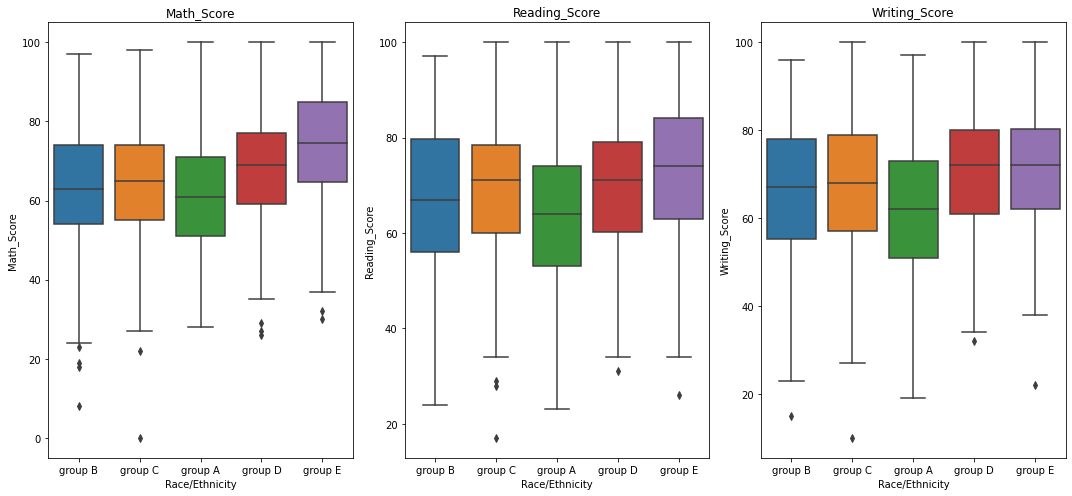

In [13]:
Box_plot_subplot(Student_dataset,(15,7),x ='Race/Ethnicity',y= lis)

According to the math and reading scores, students from Group E performed better than the other groups. Groups D and E performed the same in the writing section.The main reason for using the barplot is here it clearly shows graphically and display a variable's location and spread at a glance.

Now I am going to explore the student's parent level education also using barplot.In Bar plot frequency distribution is shown for each data category so we can easily get the idea about the data.

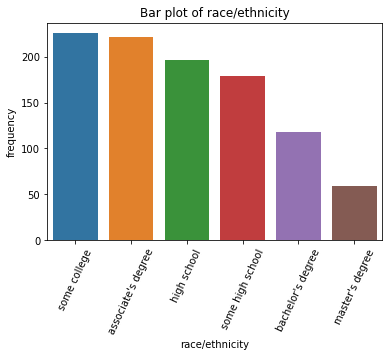

In [14]:
BarPlot(Student_dataset,Student_dataset['Parental_Level_Of_Education'].value_counts().index,Student_dataset['Parental_Level_Of_Education'].value_counts().values,'race/ethnicity','frequency','Bar plot of race/ethnicity',65)

Based on the analysis above, only 5.9% of parents have earned a Masters degree. The majority of parents have a college degree or associate degree.

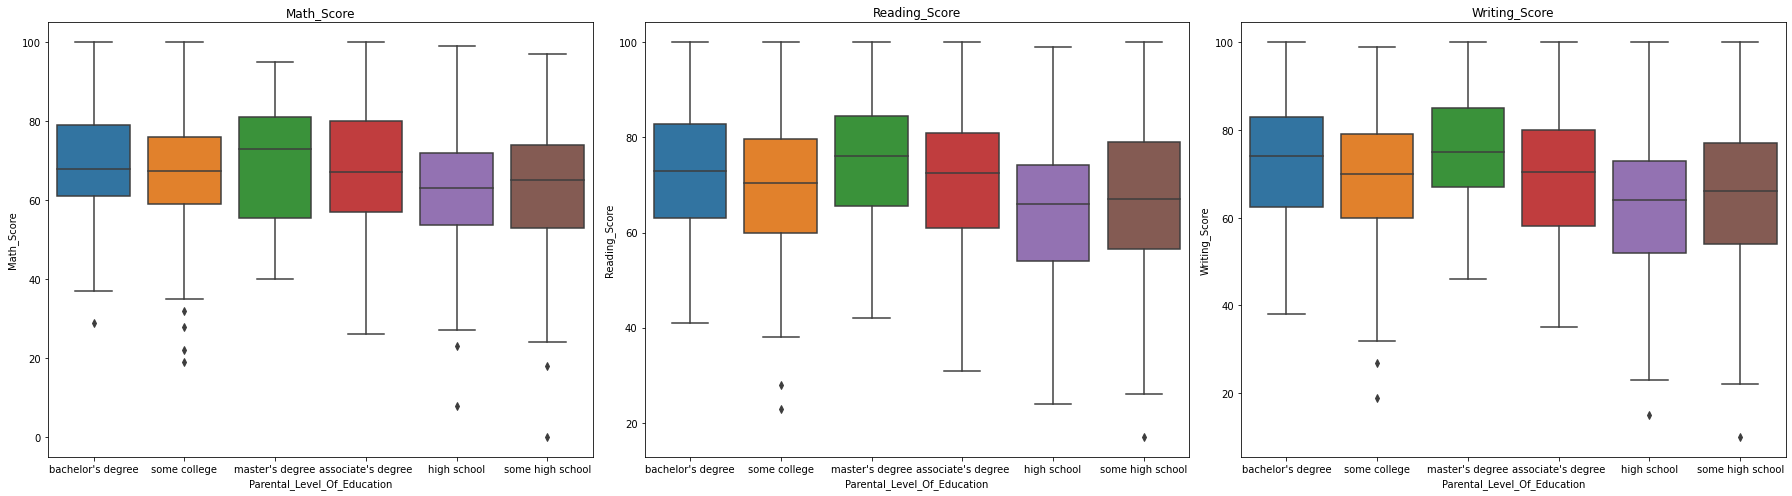

In [15]:
Box_plot_subplot(Student_dataset,(25,7),x ='Parental_Level_Of_Education',y= lis)

Boxplot  clearly shows graphically and display a variable's location and spread at a glance.All three scores were higher for students whose parent has a master's degree